## **PUTRI NUR AINI MAHFUDZ (M203Y0411)**
## **Proyek Akhir : Image Classification Model Deployment**

---



## Berikut ini Proyek Akhir : Image Classification Model Deployment yang saya kerjakan dengan memenuhi kriteria submission yang ada.

Dataset didapatkan dari : https://www.kaggle.com/datasets/alxmamaev/flowers-recognition

## Steps:

### 1.  Melakukan ekstraksi pada file zip yang sudah disimpan di direktori

In [105]:
import zipfile, os
local_zip = '/tmp/flowers.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

### 2. Melihat isi direktori

In [106]:
base_dir = os.path.join('/tmp/flowers')
labels = os.listdir(base_dir)

label_and_items = {}

for label in labels:
  items = os.listdir(os.path.join(base_dir, label))
  label_and_items[label] = len(items)

label_and_items

{'daisy': 764, 'sunflower': 733, 'tulip': 984, 'dandelion': 1052, 'rose': 784}

### 3. Melakukan pre-processing pada dataset

In [107]:
import shutil
def remove_label(label):
  shutil.rmtree(os.path.join(base_dir, label))
  labels.remove(label)
  label_and_items.pop(label)

In [108]:
remove_label('dandelion')
remove_label('tulip')

In [109]:
label_and_items

{'daisy': 764, 'sunflower': 733, 'rose': 784}

### 4. Menerapkan ImageDataGenerator

*   import ImageDataGenerator
*   melakukan augmentasi gambar pada setiap sampel di dataset
*   melakukan pemisahan data menjadi data latih dan data validasi

In [122]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.0,
                     rotation_range=20,
                     shear_range=0.2,
                     zoom_range=0.2,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='nearest',
                     validation_split=0.2)

### 5. Menyiapkan data latih dan validasi dari kumpulan data gambar yang di-load dalam memori melalui fungsi flow()

In [123]:
train_generator = train_datagen.flow_from_directory(
            base_dir,
            target_size=(150, 150),
            batch_size=32,
            class_mode='categorical',
            subset='training')
    
validation_generator = train_datagen.flow_from_directory(
            base_dir,
            target_size=(150, 150),
            batch_size=32,
            class_mode='categorical',
            subset='validation')

Found 1827 images belonging to 3 classes.
Found 454 images belonging to 3 classes.


### 6. Membangun model menggunakan model sequential

In [124]:
model = keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(labels), activation='softmax')
])

### 7. Melihat summary dari arsitektur model yang telah kita buat

In [125]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 17, 17, 64)      

### 8. Melakukan compile model dengan 'adam' optimizer loss function 'categorical_crossentropy'

In [126]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

### 9. Menerapkan Callback

In [127]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') >= 0.85 and logs.get('val_accuracy') >= 0.85:
      print('STOP')
      self.model.stop_training = True

callbacks = myCallback()

### 10. Melatih model dengan model.fit

In [128]:
history=model.fit(
      train_generator,
      steps_per_epoch=4,  #berapa batch yang akan dieksekusi pada setiap epoch
      epochs=100, #tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, #menampilkan akurasi pengujian data validasi
      validation_steps=4,  #berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,
      callbacks=[callbacks])

Epoch 1/100
4/4 - 7s - loss: 2.1765 - accuracy: 0.2969 - val_loss: 1.1735 - val_accuracy: 0.3906 - 7s/epoch - 2s/step
Epoch 2/100
4/4 - 6s - loss: 1.1454 - accuracy: 0.3281 - val_loss: 1.0366 - val_accuracy: 0.5312 - 6s/epoch - 1s/step
Epoch 3/100
4/4 - 6s - loss: 0.9896 - accuracy: 0.5234 - val_loss: 0.9621 - val_accuracy: 0.5156 - 6s/epoch - 2s/step
Epoch 4/100
4/4 - 6s - loss: 0.8721 - accuracy: 0.6094 - val_loss: 0.9284 - val_accuracy: 0.5156 - 6s/epoch - 1s/step
Epoch 5/100
4/4 - 6s - loss: 0.8487 - accuracy: 0.6172 - val_loss: 0.9544 - val_accuracy: 0.5078 - 6s/epoch - 1s/step
Epoch 6/100
4/4 - 6s - loss: 0.8582 - accuracy: 0.6094 - val_loss: 0.8681 - val_accuracy: 0.6016 - 6s/epoch - 1s/step
Epoch 7/100
4/4 - 5s - loss: 0.8094 - accuracy: 0.6061 - val_loss: 0.8226 - val_accuracy: 0.6094 - 5s/epoch - 1s/step
Epoch 8/100
4/4 - 6s - loss: 0.8336 - accuracy: 0.6406 - val_loss: 0.7852 - val_accuracy: 0.6641 - 6s/epoch - 1s/step
Epoch 9/100
4/4 - 6s - loss: 0.6529 - accuracy: 0.7656 -

### 11. Melihat visualisasi nilai akurasi dan loss

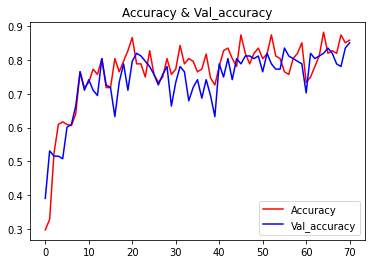

<Figure size 432x288 with 0 Axes>

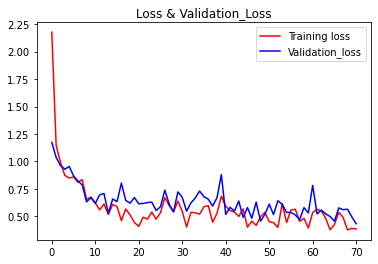

<Figure size 432x288 with 0 Axes>

In [132]:
import matplotlib.pyplot as plt    

acc = history.history['accuracy']                                                
val_acc = history.history['val_accuracy']                                         
loss = history.history['loss']                                                    
val_loss = history.history['val_loss']                                            

epochs = range(len(acc))                                                          

plt.plot(epochs, acc, 'r', label='Accuracy')                                                 
plt.plot(epochs, val_acc, 'b', label='Val_accuracy')                          
plt.title('Accuracy & Val_accuracy')                                        
plt.legend(loc=0)                                                                 
plt.figure()                                                                      
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation_loss')
plt.title('Loss & Validation_Loss')
plt.legend(loc=0)
plt.figure()
plt.show()


In [133]:
print(train_generator.class_indices)

{'daisy': 0, 'rose': 1, 'sunflower': 2}


### 12. Uji coba model dengan mengupload gambar

In [ ]:
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150, 150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=32)  
  print(fn)
  if classes[0][0]==1:
    print('daisy')                                 
  elif classes[0][1]==1:
    print('rose')                                   
  elif classes[0][2]==1:
    print('sunflower')                                
  else:
    print('UNKNOWN')

### 13. Menyimpan model dalam formatTF-Lite

In [137]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [138]:
with tf.io.gfile.GFile("model.tflite", "wb") as f:
  f.write(tflite_model)

## **Terimakasih.**

## **Submission project kelas Belajar Pengembangan Machine Learning - 2022** 